In [1]:
import os

os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
import geopandas as gpd
import pandas as pd

# path to data
example_data_path = "./data"
# TODO: upload example data somewhere and download it in script

# load data required for blocks cutter
city_geometry = gpd.read_parquet(os.path.join(example_data_path, "city_geometry.parquet"))
water_geometry = gpd.read_parquet(os.path.join(example_data_path, "water_geometry.parquet"))
roads_geometry = gpd.read_parquet(os.path.join(example_data_path, "roads_geometry.parquet"))
railways_geometry = gpd.read_parquet(os.path.join(example_data_path, "railways_geometry.parquet"))
nature_geometry_boundaries = gpd.read_parquet(os.path.join(example_data_path, "nature_geometry_boundaries.parquet"))

<Axes: >

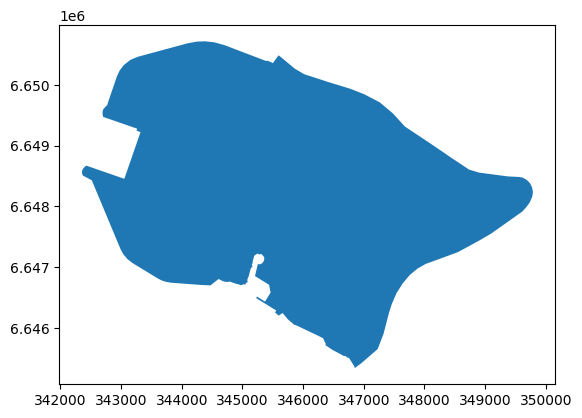

In [2]:
gpd.GeoDataFrame(geometry=[city_geometry.unary_union]).plot()

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

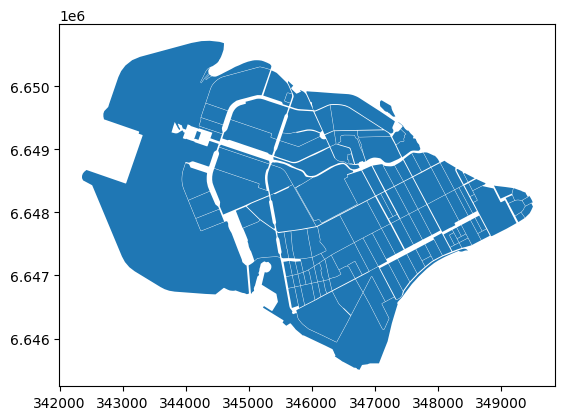

In [3]:
from masterplan_tools.method.blocks import BlocksCutter, BlocksCutterParameters, BlocksCutterGeometries, BlocksCutterFeatureType
from masterplan_tools.models.geojson import GeoJSON

# for example, we can change some of cutter's parameters like buffers
params = BlocksCutterParameters(roads_buffer=10, block_cutoff_ratio=0.05)
geoms = BlocksCutterGeometries(
    city=GeoJSON[BlocksCutterFeatureType].from_gdf(city_geometry),
    water=GeoJSON[BlocksCutterFeatureType].from_gdf(water_geometry),
    roads=GeoJSON[BlocksCutterFeatureType].from_gdf(roads_geometry),
    railways=GeoJSON[BlocksCutterFeatureType].from_gdf(railways_geometry),
    nature=GeoJSON[BlocksCutterFeatureType].from_gdf(nature_geometry_boundaries),
)
cutter = BlocksCutter(parameters=params, geometries=geoms)
blocks = cutter.cut_blocks()
blocks.to_gdf()